https://stepik.org/lesson/1370099/step/1

https://proproprogs.ru/ml/ml-bayesovskiy-vyvod-naivnaya-bayesovskaya-klassifikaciya

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_16.py

[Наивный байесовский классификатор. Основная идея, модификации и реализация с нуля на Python](https://habr.com/ru/articles/802185/)

[Машинное обучение: Наивный байесовский классификатор. Теория и реализация. С нуля](https://habr.com/ru/articles/870718/)



In [ ]:
# Пример реализации наивного гауссовского байесовского классификатора

import numpy as np


x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

# формула для вычисления дисперсии здесь немного другая 1/N*sum(...)
sw1, sl1 = np.var(x_train[y_train == 1], axis=0, ddof=1)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0, ddof=1)

print('МО: ', mw1, ml1, mw_1, ml_1)
print('Дисперсии:', sw1, sl1, sw_1, sl_1)

x = [10, 40]  # ширина, длина жука

a_1 = lambda x: -np.log(sw_1 * sl_1) - (x[0] - mw_1) ** 2 / (2 * sw_1) - (x[1] - ml_1) ** 2 / (2 * sl_1)
a1 = lambda x: -np.log(sw1 * sl1) - (x[0] - mw1) ** 2 / (2 * sw1) - (x[1] - ml1) ** 2 / (2 * sl1)
y = np.argmax([a_1(x), a1(x)]) * 2 - 1 # делаем метку либо 1 либо -1

print('Номер класса (-1 - гусеница, 1 - божья коровка): ', y)

# тестирование по обучающей выборки
pr = []
for x in x_train:
    pr.append(np.argmax([a_1(x), a1(x)]) * 2 - 1)

pr = np.array(pr)
Q = np.mean(pr != y_train) # доля ошибок
print(Q)
prob1 = [np.exp(a1(x)) for x in x_train]
prob1

МО:  31.0 35.0 14.4 52.0
Дисперсии: 80.0 50.0 34.3 182.5
Номер класса (-1 - гусеница, 1 - божья коровка):  -1
0.0


[1.6739915392821497e-06,
 9.139684121594088e-05,
 0.0001554712641162551,
 2.2655011910444298e-07,
 2.415246349166288e-10,
 0.00011735586712624183,
 9.139684121594088e-05,
 4.317281081659188e-05,
 0.00011735586712624183,
 6.830930611823143e-06]

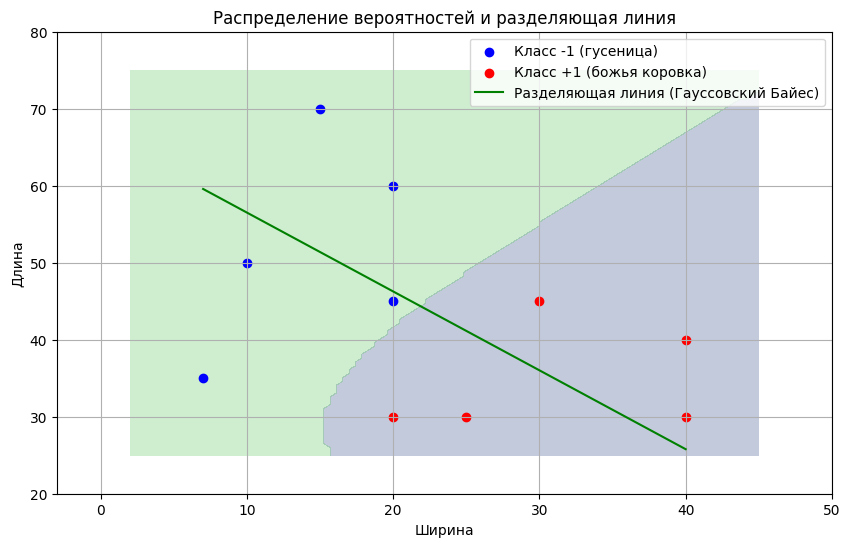

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Обучающие данные
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70],
                    [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Вычисление средних и дисперсий
mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

sw1, sl1 = np.var(x_train[y_train == 1], axis=0, ddof=1)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0, ddof=1)

# Создание сетки для визуализации
x_min, x_max = x_train[:, 0].min() - 5, x_train[:, 0].max() + 5
y_min, y_max = x_train[:, 1].min() - 5, x_train[:, 1].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Вычисление вероятностей для каждого класса на сетке
Z_0 = np.array([a_1([xi, yi]) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z_0 = Z_0.reshape(xx.shape)

Z_1 = np.array([a1([xi, yi]) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z_1 = Z_1.reshape(xx.shape)

# Построение графика
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_0 > Z_1, alpha=0.3)
plt.scatter(x_train[y_train == -1][:, 0], x_train[y_train == -1][:, 1], color='blue', label='Класс -1 (гусеница)')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='red', label='Класс +1 (божья коровка)')

# Построение разделяющей линии
x_line = np.linspace(x_min + 5, x_max - 5)
y_line = (ml_1 - ml1) / (mw_1 - mw1) * (x_line - mw_1) + ml_1

plt.plot(x_line, y_line , color='green', label='Разделяющая линия (Гауссовский Байес)')
plt.xlim(x_min-5,x_max+5)
plt.ylim(y_min-5,y_max+5)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.title('Распределение вероятностей и разделяющая линия')
plt.legend()
plt.grid()
plt.show()
